In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [2]:
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [3]:
city_data_df.tail(20)

,city,driver_count,type
100,North Richardhaven,1,Suburban
101,North Jeffrey,11,Suburban
102,South Jennifer,7,Rural
103,West Heather,4,Rural
104,Newtonview,1,Rural
105,North Holly,8,Rural
106,Michaelberg,6,Rural
107,Taylorhaven,1,Rural
108,Penaborough,6,Rural
109,Harringtonfort,4,Rural


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Get the columns and the rows that are not null.
city_data_df.notnull().sum()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(city_data_df["type"]=="Urban")


66

In [9]:
sum(city_data_df["type"]=="Suburban")

36

In [10]:
sum(city_data_df["type"]=="Rural")

18

In [11]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#Merget the city and rider dataframes 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.tail(20)

,city,date,fare,ride_id,driver_count,type
2355,North Holly,2019-01-03 19:51:01,19.90,5559509612597,8,Rural
2356,New Ryantown,2019-05-05 19:29:38,26.53,2302209966018,2,Rural
2357,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural
2358,Lake Latoyabury,2019-02-25 04:10:19,16.18,8492924830016,2,Rural
2359,South Marychester,2019-01-19 11:40:46,49.44,90058815985,1,Rural
2360,Jessicaport,2019-01-31 17:57:25,58.29,623154556195,1,Rural
2361,Michaelberg,2019-03-22 22:20:54,38.30,8032727406577,6,Rural
2362,North Holly,2019-04-18 19:26:25,30.94,3441061016826,8,Rural
2363,Michaelberg,2019-03-13 14:40:18,37.72,8842606115175,6,Rural
2364,Lake Jamie,2019-02-25 23:46:02,28.65,5815763839331,4,Rural


In [14]:
#Separate into three dataframes by city type
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [16]:
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.count()

city            125
date            125
fare            125
ride_id         125
driver_count    125
type            125
dtype: int64

In [17]:
#Get the number of rides per city type
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [18]:
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [19]:
#Get the average fare per city type 
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]

In [20]:
#Get the average number of drivers per city type 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


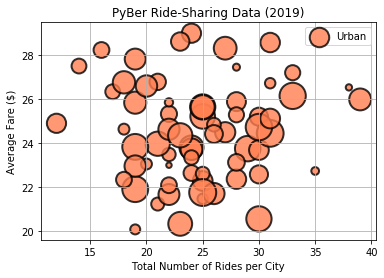

In [21]:
#Plot scatter graph for urban type
plt.scatter(urban_ride_count, urban_avg_fare, label="Urban", s =10*urban_driver_count, 
            c = "coral", alpha = 0.8,edgecolor = "black", linewidth = 2)
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

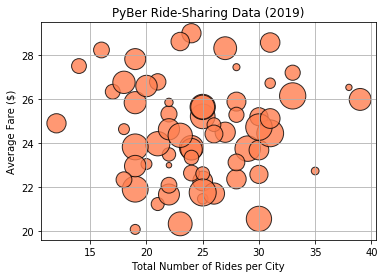

In [22]:
#Plot scatter graph for urban type using object_oriented method 
fig, ax = plt.subplots()
ax.scatter(urban_ride_count, urban_avg_fare, label = "Urban", 
           s = 10*urban_driver_count, color="coral", alpha = 0.8, edgecolor = "black")
ax.set_xlabel("Total Number of Rides per City")
ax.set_ylabel("Average Fare ($)")
ax.set_title("PyBer Ride-Sharing Data (2019)")
ax.grid()


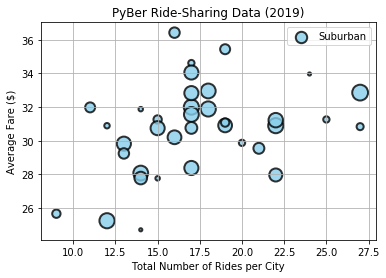

In [23]:
plt.scatter(suburban_ride_count, suburban_avg_fare, label="Suburban", s =10*suburban_driver_count, 
            c = "skyblue", alpha = 0.8,edgecolor = "black", linewidth = 2)
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

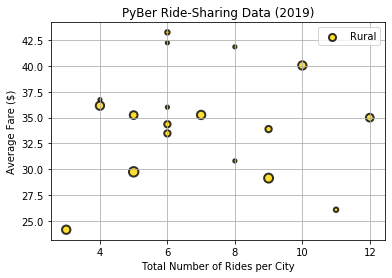

In [24]:
plt.scatter(rural_ride_count, rural_avg_fare, label="Rural", s =10*rural_driver_count, 
            c = "gold", alpha = 0.8,edgecolor = "black", linewidth = 2)
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

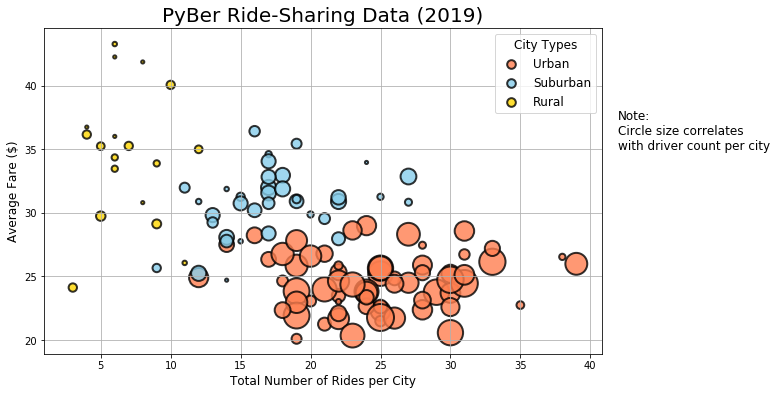

In [25]:
#Combine three plots into one 
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, label="Urban", s =10*urban_driver_count, 
            c = "coral", alpha = 0.8,edgecolor = "black", linewidth = 2)


plt.scatter(suburban_ride_count, suburban_avg_fare, label="Suburban", s =10*suburban_driver_count, 
            c = "skyblue", alpha = 0.8,edgecolor = "black", linewidth = 2)


plt.scatter(rural_ride_count, rural_avg_fare, label="Rural", s =10*rural_driver_count, 
            c = "gold", alpha = 0.8,edgecolor = "black", linewidth = 2)

plt.xlabel("Total Number of Rides per City", fontsize = 12)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.grid(True)

#create a legend
lgnd = plt.legend(fontsize = "12", mode = "Expanded",loc="best", scatterpoints=1, title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
#Incorporate a text label about circle size 
plt.text(42, 35, "Note:\nCircle size correlates \nwith driver count per city", fontsize = "12")
plt.savefig("analysis/Fig1.png")

Text(42, 35, 'Note:\nCircle size correlates \nwith driver count per city')

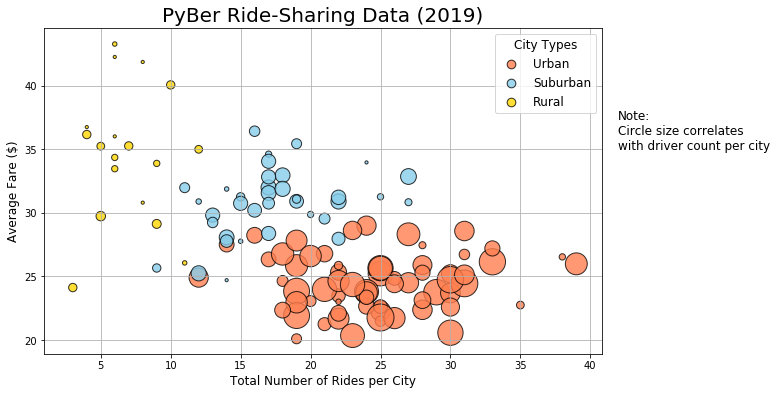

In [26]:
#Combine three plots into one using object_oriented method 
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(urban_ride_count, urban_avg_fare, label = "Urban", 
           s = 10*urban_driver_count, color="coral", alpha = 0.8, edgecolor = "black")
ax.scatter(suburban_ride_count, suburban_avg_fare, label = "Suburban", 
           s = 10*suburban_driver_count, color="skyblue", alpha = 0.8, edgecolor = "black")
ax.scatter(rural_ride_count, rural_avg_fare, label = "Rural", 
           s = 10*rural_driver_count, color="gold", alpha = 0.8, edgecolor = "black")
ax.set_title("PyBer Ride-Sharing Data (2019)", fontsize=20)
ax.set_xlabel("Total Number of Rides per City", fontsize = 12)
ax.set_ylabel("Average Fare ($)", fontsize = 12)
lgnd = plt.legend(fontsize = "12", mode = "Expanded",loc="best", scatterpoints=1, title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
ax.grid()
ax.text(42, 35, "Note:\nCircle size correlates \nwith driver count per city", fontsize = "12")




In [27]:
#get the summary of statistics 
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [28]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
#get the mean of ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2),round(rural_ride_count.mean(), 2) 

(24.62, 17.36, 6.94)

In [30]:
#get the median of ride count for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2),round(rural_ride_count.median(), 2) 

(24.0, 17.0, 6.0)

In [31]:
#get the mode of ride count for each city type
round(urban_ride_count.mode(), 2), round(suburban_ride_count.mode(), 2),round(rural_ride_count.mode(), 2) 

(0    22
 1    25
 dtype: int64, 0    17
 dtype: int64, 0    6
 dtype: int64)

In [32]:
import numpy as np
import scipy.stats as sts

In [33]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(mean_urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
print(median_urban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride count in suburban cities is: {mode_suburban_ride_count}")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride count in urban cities is: {mode_urban_ride_count}")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(mode_rural_ride_count)

24.62121212121212
24.0
The mode for the ride count in suburban cities is: ModeResult(mode=array([17]), count=array([7]))
The mode for the ride count in urban cities is: ModeResult(mode=array([22]), count=array([7]))
ModeResult(mode=array([6]), count=array([5]))


In [34]:
#get the average fare by city type 
urban_fares = urban_cities_df["fare"]
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [35]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares}")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares}")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}")

The mean fare price for urban trips is $24.52577230769236
The median fare price for urban trips is $24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [36]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.describe()

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [37]:
rural_fares = rural_cities_df["fare"]
rural_fares.describe()

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [38]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [39]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [40]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.describe()

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [41]:
#get the mode of city types using Pandas
round(urban_drivers.mode(),2), round(suburban_drivers.mode(),2), round(rural_drivers.mode(),2)

(0    39
 dtype: int64, 0    20
 dtype: int64, 0    1
 dtype: int64)

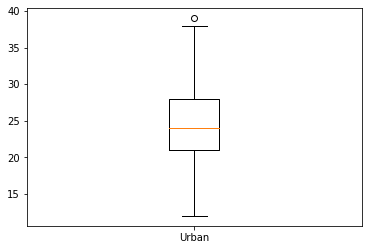

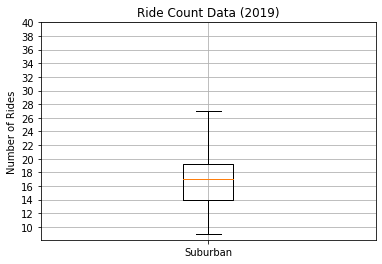

In [42]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels=["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Create a box-and-whisker plot for the suburban cities ride count.
x1_labels=["Suburban"]
fig1, ax1 = plt.subplots()
ax1.boxplot(suburban_ride_count, labels=x1_labels)
ax1.set_title("Ride Count Data (2019)")
ax1.set_ylabel("Number of Rides")
ax1.set_yticks(np.arange(10,41,step=2))
ax1.grid(True)



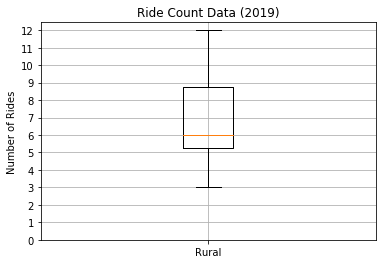

In [43]:
# Create a box-and-whisker plot for the rural cities ride count.
x2_labels=["Rural"]
fig2, ax2 = plt.subplots()
ax2.boxplot(rural_ride_count, labels=x2_labels)
ax2.set_title("Ride Count Data (2019)")
ax2.set_ylabel("Number of Rides")
ax2.set_yticks(np.arange(0,13,step=1))
ax2.grid(True)

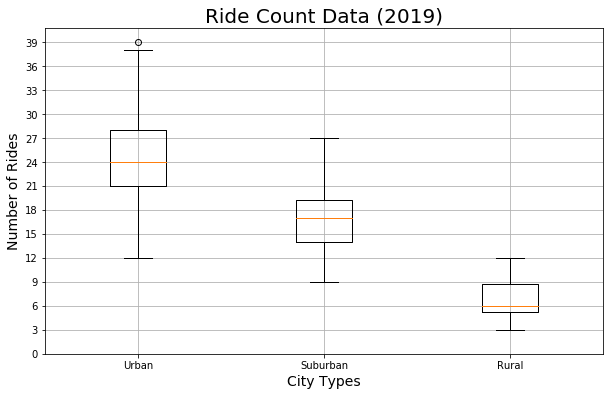

In [44]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban","Suburban","Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax=plt.subplots(figsize =(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title("Ride Count Data (2019)",fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.grid()
ax.set_yticks(np.arange(0,41, step=3))
#save fig
plt.savefig("analysis/Fig2.png")


In [45]:
# Get the city that matches 39..index[0]
urban_city_outlier = urban_ride_count[urban_ride_count==39]
print(f"{(urban_city_outlier).index[0]} has the highest ride count of 39.")

West Angela has the highest ride count of 39.


Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

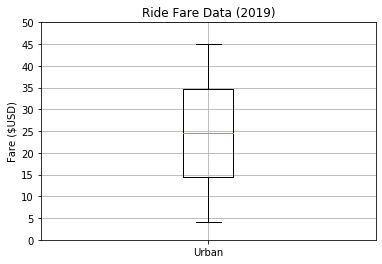

In [46]:
# Create a box-and-whisker plot for the urban fare data.
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.grid()
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51, step=5))
print("Summary Statistics")
urban_fares.describe()

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

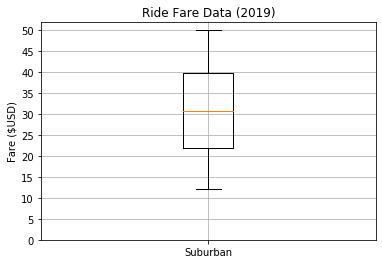

In [47]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels=["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
ax.grid()
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51, step=5))
print("Summary Statistics")
suburban_fares.describe()

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

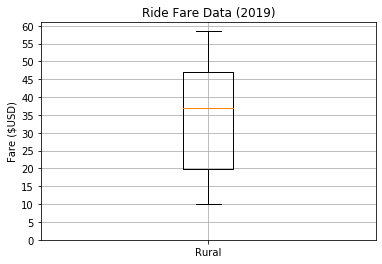

In [48]:
# Create a box-and-whisker plot for the rural fare data.
x_labels=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
ax.grid()
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,61, step=5))
print("Summary Statistics")
rural_fares.describe()

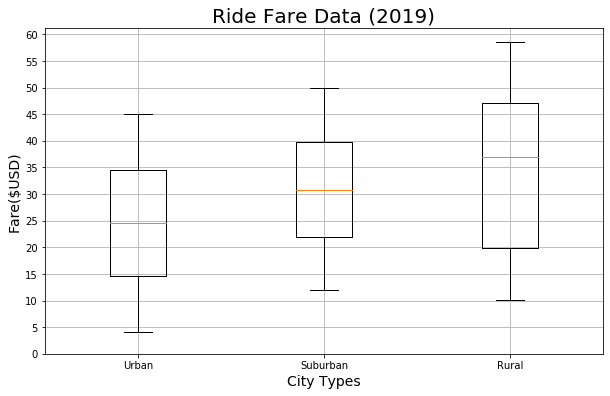

In [49]:
#combine 3 box-and-whisker plots into one plot for 3 city types
x_labels =["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels = x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_ylabel("Fare($USD)", fontsize=14)
ax.set_yticks(np.arange(0, 61, step=5))
ax.grid()
ax.set_xlabel("City Types", fontsize = 14)
plt.savefig("analysis/ride_data.png")

summary statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

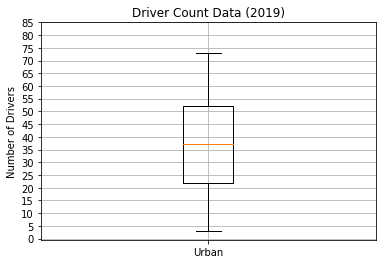

In [50]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
ax.set_ylabel("Number of Drivers")
ax.set_title("Driver Count Data (2019)")
ax.set_yticks(np.arange(0,86, step=5))
ax.grid()
print("summary statistics")
urban_drivers.describe()

summary statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

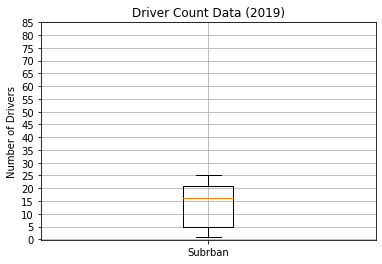

In [51]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
ax.set_ylabel("Number of Drivers")
ax.set_title("Driver Count Data (2019)")
ax.set_yticks(np.arange(0,86, step=5))
ax.grid()
print("summary statistics")
suburban_drivers.describe()

summary statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

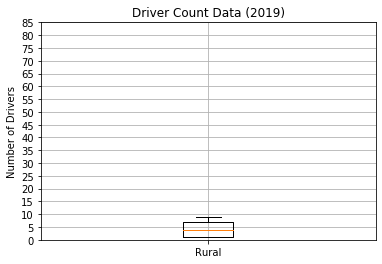

In [52]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
ax.set_ylabel("Number of Drivers")
ax.set_title("Driver Count Data (2019)")
ax.set_yticks(np.arange(0,86, step=5))
ax.grid()
print("summary statistics")
rural_drivers.describe()

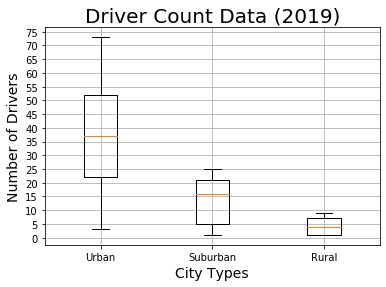

In [53]:
#Combine 3 boxplots 
x_labels=["Urban", "Suburban", "Rural"]
driver_data=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_data, labels=x_labels)
ax.set_title("Driver Count Data (2019)", fontsize = 20)
ax.set_yticks(np.arange(0,76, step=5))
ax.set_xlabel("City Types", fontsize = 14)
ax.set_ylabel("Number of Drivers", fontsize = 14)
ax.grid()


In [54]:
#Calculate the total fare for each city type 
sum_fare_by_type = pyber_data_df.groupby("type").sum()["fare"]
sum_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [55]:
#calculate the total fare
total_fare = pyber_data_df["fare"].sum()
total_fare

63538.64

In [56]:
type_percents = sum_fare_by_type/total_fare*100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [57]:
type_percents = (pyber_data_df.groupby("type").sum()["fare"])/(pyber_data_df["fare"].sum())*100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

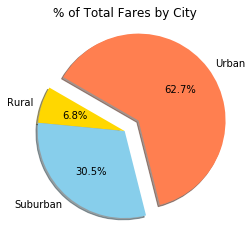

In [58]:
import matplotlib as mpl
fig, ax= plt.subplots()
explode_values = [0,0,0.2]
labels = ["Rural", "Suburban", "Urban"]
ax.pie(type_percents, labels = labels,explode = explode_values,
       colors = ["gold", "skyblue","coral"], autopct = "%.1f%%", 
       shadow = True, startangle = 150)
ax.set_title("% of Total Fares by City")
#Change the default font size from 10 to 14 
mpl.rcParams["font.size"]=14
#save the fig
plt.savefig('analysis/totalfares.png')

In [70]:
#Get total rides percentage by city type 
total_rides_percentage = pyber_data_df.groupby("type").count()["ride_id"]/pyber_data_df["ride_id"].count()*100
total_rides_percentage

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [71]:
import matplotlib as mpl

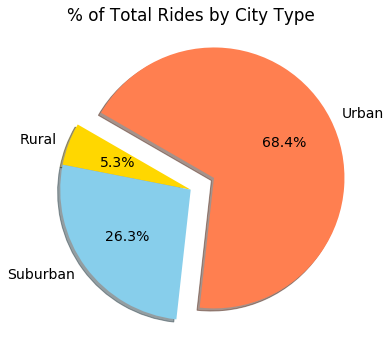

In [78]:
fig, ax = plt.subplots(figsize = (10,6))
labels = ["Rural", "Suburban", "Urban"]
explode_values = [0,0,0.2]
ax.pie(total_rides_percentage,labels = labels, colors = ["gold", "skyblue", "coral"], 
       autopct = "%.1f%%", shadow = True, explode = explode_values, startangle = 150)
ax.set_title("% of Total Rides by City Type")
mpl.rcParams["font.size"]=14
plt.savefig("analysis/total_rides_pct")

In [79]:
#get total drivers percentage by city type 
driver_percents = pyber_data_df.groupby("type").sum()["driver_count"]/(pyber_data_df["driver_count"].sum())*100
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

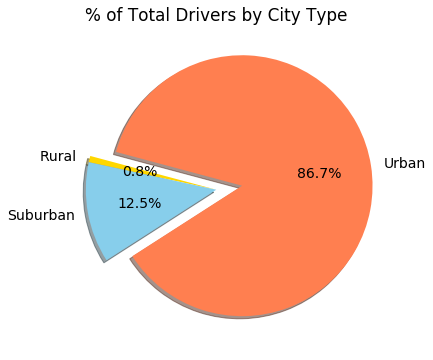

In [82]:
#Output pie chart 
fig, ax = plt.subplots(figsize = (10,6))
labels = ["Rural", "Suburban", "Urban"]
explode_values = [0,0,0.2]
ax.pie(driver_percents,labels = labels, colors = ["gold", "skyblue", "coral"], 
       autopct = "%.1f%%", shadow = True, explode = explode_values, startangle = 165)
ax.set_title("% of Total Drivers by City Type")
mpl.rcParams["font.size"]=14
plt.savefig("analysis/total_drivers_pct")
